### Author: [Parvaneh Yaghoubi](https://github.com/parvanehyaghoubi)

# Practical Implementation

Implement signal-processing knowledge in real-life applications.

# Import libraries

In [2]:
import sys
import time
import  matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd
from scipy import signal
import numpy as np
from scipy.integrate import simpson
from scipy import signal
import re

# Import Dataset

Index(['Unnamed: 0', 'ch1'], dtype='object')
(10000, 2)


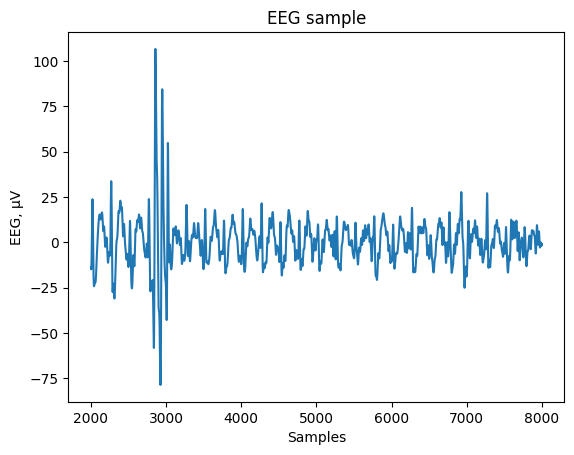

In [4]:
data_1_morning = "dataset/1_morning.xlsx"
data_1_evening = "dataset/1_evening.xlsx"
data_2_morning = "dataset/2_morning.xlsx"
data_2_evening = "dataset/2_evening.xlsx"
data_3_morning = "dataset/3_morning.xlsx"
data_3_evening = "dataset/3_evening.xlsx"
data_4_morning = "dataset/4_morning.xlsx"
data_4_evening = "dataset/4_evening.xlsx"
data_5_morning = "dataset/5_morning.xlsx"
data_5_evening = "dataset/5_evening.xlsx"


data = pd.read_excel(data_1_morning)
print(data.columns)
print(data.shape)
data = data["ch1"]
plt.xlabel('Samples')
plt.ylabel('EEG, μV')
plt.title('EEG sample')
plt.plot(data[2000:8000]) # use the clean data
plt.show()



**Approximate Entropy (ApEn)**:

ApEn analyzes time series data from EEG recordings, typically using segments of  the data points (few seconds of EEG signal).  
It calculates the probability that similar patterns of observations will remain similar in the next incremental comparisons.

Definition: ApEn measures the likelihood that patterns that are similar within a dataset will remain similar when additional data points are included.
Application: It is often used to assess the regularity or predictability of EEG signals. Lower ApEn values suggest more regular patterns.

Reasons for Calculating Entropy in EEG Signals
Quantifying Complexity: Entropy provides a quantitative measure of the complexity of EEG signals, which can be indicative of different states of brain function or dysfunction.
Detecting Changes in Brain States: Entropy can be used to detect transitions between different brain states, such as from wakefulness to sleep, or during different cognitive tasks.

Monitoring Brain Activity: Entropy is useful for monitoring brain activity in real-time, providing insights into how the brain responds to various stimuli or conditions.

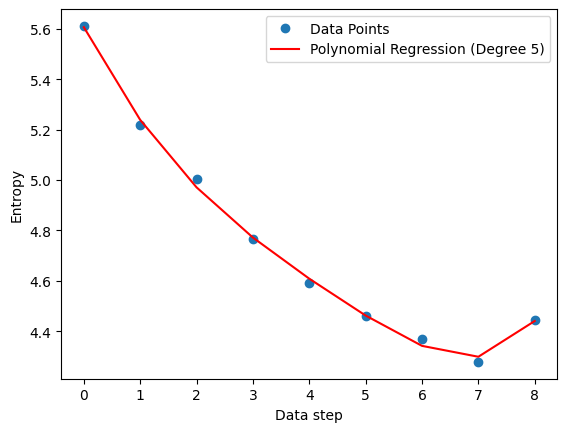

In [5]:
"""
The script iterates over increasing data segments, calculates their differential entropy,
 and stores these values. It then fits a polynomial regression to the entropy data
 and plots both the entropy values
and the fitted polynomial curve to visualize the relationship between data EEG in different time and entropy.
"""
from scipy.stats import differential_entropy, norm

data_ent_graph = []

for a in range (1000, len(data), 1000):
    values = data[:a]
    data_ent_final = differential_entropy(values)
    data_ent_graph.append(data_ent_final)

x_inter_removed_high = []
for data_x in range (0, len(data_ent_graph),1):
    x_inter_removed_high.append(data_x)

degree = 5

# Polynomial regression
coefficients = np.polyfit(x_inter_removed_high, data_ent_graph, degree)
# Polynomial coefficients
y_poly = np.polyval(coefficients, x_inter_removed_high)

plt.xlabel('Data step')
plt.ylabel('Entropy')
plt.plot(x_inter_removed_high, data_ent_graph, 'o', label='Data Points')
plt.plot(x_inter_removed_high, y_poly, 'r', label=f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()